In [1]:
# %pip install pydeseq2

In [2]:
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats

import pandas as pd

In [3]:
counts = pd.read_csv('count_table_for_deseq_example.csv')
counts = counts.set_index('Geneid').astype(int)
counts

,Ctr_s1,Ctr_s2,Ctr_s7,Ctr_s13,RS_s6,RS_s9,RS_s12,RS_s16
Geneid,,,,,,,,
ENSG00000284662,0,0,0,0,0,0,0,0
ENSG00000186827,0,0,1,1,4,0,0,3
ENSG00000186891,1,0,0,0,0,2,2,2
ENSG00000160072,361,427,416,549,328,174,246,202
ENSG00000041988,118,156,124,133,101,56,85,89
...,...,...,...,...,...,...,...,...
ENSG00000271254,56,55,54,76,47,67,49,53
ENSG00000275987,0,0,1,0,0,0,0,0
ENSG00000268674,0,0,0,0,0,0,0,0


In [4]:
counts = counts[counts.sum(axis = 1) > 0]
counts.head()

,Ctr_s1,Ctr_s2,Ctr_s7,Ctr_s13,RS_s6,RS_s9,RS_s12,RS_s16
Geneid,,,,,,,,
ENSG00000186827,0,0,1,1,4,0,0,3
ENSG00000186891,1,0,0,0,0,2,2,2
ENSG00000160072,361,427,416,549,328,174,246,202
ENSG00000041988,118,156,124,133,101,56,85,89
ENSG00000260179,2,0,1,2,0,1,0,0


In [5]:
counts = counts.T
counts.head()

Geneid,ENSG00000186827,ENSG00000186891,ENSG00000160072,ENSG00000041988,ENSG00000260179,ENSG00000225972,ENSG00000224315,ENSG00000198744,ENSG00000228037,ENSG00000142611,...,ENSG00000278673,ENSG00000278704,ENSG00000277400,ENSG00000276256,ENSG00000273748,ENSG00000278817,ENSG00000278384,ENSG00000276345,ENSG00000271254,ENSG00000275987
Ctr_s1,0,1,361,118,2,6,0,1,0,73,...,1,0,4,74,26,0,2,20,56,0
Ctr_s2,0,0,427,156,0,2,0,494,0,24,...,1,0,0,16,50,0,7,0,55,0
Ctr_s7,1,0,416,124,1,3,0,6,0,54,...,0,0,1,68,37,1,6,0,54,1
Ctr_s13,1,0,549,133,2,4,0,4,0,14,...,0,0,3,28,15,0,5,0,76,0
RS_s6,4,0,328,101,0,8,1,624,0,5,...,1,0,1,15,40,1,8,0,47,0


In [6]:
# C for control and RS for senescence
metadata = pd.DataFrame(zip(counts.index, ['C','C','C','C', 'RS', 'RS', 'RS', 'RS']),
                        columns = ['Sample', 'Condition'])
metadata = metadata.set_index('Sample')
metadata

,Condition
Sample,
Ctr_s1,C
Ctr_s2,C
Ctr_s7,C
Ctr_s13,C
RS_s6,RS
RS_s9,RS
RS_s12,RS
RS_s16,RS


In [7]:
dds = DeseqDataSet(counts=counts,
            clinical=metadata,
            design_factors="Condition")


#design_factors=["batch", "condition"] = ~ batch + condtion

In [8]:
#observation df
dds.obs

,Condition
Sample,
Ctr_s1,C
Ctr_s2,C
Ctr_s7,C
Ctr_s13,C
RS_s6,RS
RS_s9,RS
RS_s12,RS
RS_s16,RS


In [9]:
# The count matrix
dds.X

array([[  0,   1, 361, ...,  20,  56,   0],
       [  0,   0, 427, ...,   0,  55,   0],
       [  1,   0, 416, ...,   0,  54,   1],
       ...,
       [  0,   2, 174, ...,  12,  67,   0],
       [  0,   2, 246, ...,   0,  49,   0],
       [  3,   2, 202, ...,   0,  53,   0]])

In [10]:
# and the gene ids
dds.var

""
Geneid
ENSG00000186827
ENSG00000186891
ENSG00000160072
ENSG00000041988
ENSG00000260179
...
ENSG00000278817
ENSG00000278384
ENSG00000276345


In [11]:
# This adds a bunch of stats
dds.deseq2()

Fitting size factors...
... done in 0.06 seconds.

Fitting dispersions...
... done in 4.18 seconds.

Fitting dispersion trend curve...
... done in 9.76 seconds.

Fitting MAP dispersions...


/home/tealeave/mambaforge/envs/pydeseq/lib/python3.8/site-packages/anndata/_core/views.py:113: RuntimeWarning: invalid value encountered in log
  results = super().__array_ufunc__(
/home/tealeave/mambaforge/envs/pydeseq/lib/python3.8/site-packages/pydeseq2/utils.py:611: RuntimeWarning: invalid value encountered in log
  log_alpha_hat = np.log(alpha_hat)
/home/tealeave/mambaforge/envs/pydeseq/lib/python3.8/site-packages/pydeseq2/utils.py:652: RuntimeWarning: invalid value encountered in log
  x0=np.log(alpha_hat),
/home/tealeave/mambaforge/envs/pydeseq/lib/python3.8/site-packages/numpy/linalg/linalg.py:2079: RuntimeWarning: invalid value encountered in slogdet
  sign, logdet = _umath_linalg.slogdet(a, signature=signature)
/home/tealeave/mambaforge/envs/pydeseq/lib/python3.8/site-packages/pydeseq2/utils.py:611: RuntimeWarning: invalid value encountered in log
  log_alpha_hat = np.log(alpha_hat)
/home/tealeave/mambaforge/envs/pydeseq/lib/python3.8/site-packages/pydeseq2/utils.py:652: Runt

... done in 8.13 seconds.

Fitting LFCs...


/home/tealeave/mambaforge/envs/pydeseq/lib/python3.8/site-packages/pydeseq2/dds.py:623: RuntimeWarning: invalid value encountered in log
  self.varm["_outlier_genes"] = np.log(self.varm["genewise_dispersions"]) > np.log(


... done in 3.50 seconds.

Refitting 0 outliers.



In [12]:
dds

AnnData object with n_obs × n_vars = 8 × 31378
    obs: 'Condition'
    uns: 'trend_coeffs', '_squared_logres', 'prior_disp_var'
    obsm: 'design_matrix', 'size_factors'
    varm: 'non_zero', '_rough_dispersions', 'genewise_dispersions', '_genewise_converged', '_normed_means', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced'
    layers: 'normed_counts', '_mu_hat', '_mu_LFC', '_hat_diagonals', 'cooks'

In [13]:
# This is set to compare RS (senescence) group to C (control) group 
stat_res = DeseqStats(dds, n_cpus=8, contrast = ('Condition','RS','C'))

In [14]:
# execute the calculation, the genes with low basemeam prob has a bunch of zeros
stat_res.summary()

Running Wald tests...
... done in 1.88 seconds.

Log2 fold change & Wald test p-value: Condition RS vs C


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
Geneid,,,,,,
ENSG00000186827,1.107782,2.119166,1.486697,1.425419,0.154036,NaN
ENSG00000186891,1.071147,2.761974,1.566738,1.762882,0.077920,NaN
ENSG00000160072,320.481168,-0.492175,0.147030,-3.347457,0.000816,0.013103
ENSG00000041988,103.354977,-0.282138,0.130485,-2.162226,0.030601,0.173132
ENSG00000260179,0.758697,-1.637766,1.558991,-1.050529,0.293475,NaN
...,...,...,...,...,...,...
ENSG00000278817,0.352622,1.119898,1.744744,0.641870,0.520958,NaN
ENSG00000278384,3.791022,-0.243724,0.662745,-0.367750,0.713060,0.894836
ENSG00000276345,4.833929,-0.092388,3.260101,-0.028339,0.977392,0.993656


In [15]:
# get the above df and assign it to res
res = stat_res.results_df
res.shape, res.head()

((31378, 6),
                    baseMean  log2FoldChange     lfcSE      stat    pvalue  \
 Geneid                                                                      
 ENSG00000186827    1.107782        2.119166  1.486697  1.425419  0.154036   
 ENSG00000186891    1.071147        2.761974  1.566738  1.762882  0.077920   
 ENSG00000160072  320.481168       -0.492175  0.147030 -3.347457  0.000816   
 ENSG00000041988  103.354977       -0.282138  0.130485 -2.162226  0.030601   
 ENSG00000260179    0.758697       -1.637766  1.558991 -1.050529  0.293475   
 
                      padj  
 Geneid                     
 ENSG00000186827       NaN  
 ENSG00000186891       NaN  
 ENSG00000160072  0.013103  
 ENSG00000041988  0.173132  
 ENSG00000260179       NaN  )

In [16]:
# %pip install sanbomics

In [17]:
from sanbomics.tools import id_map
import itertools

mapper = id_map(species = 'human')
# the mapper is the dictionary of the genes for ensemble ids, let's check out 5 k,v pairs
dict(itertools.islice(mapper.mapper.items(), 5))

{'ENSG00000210049': 'MT-TF',
 'ENSG00000211459': 'MT-RNR1',
 'ENSG00000210077': 'MT-TV',
 'ENSG00000210082': 'MT-RNR2',
 'ENSG00000209082': 'MT-TL1'}

In [18]:
res['Symbol'] = res.index.map(mapper.mapper)
res.head()

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Symbol
Geneid,,,,,,,
ENSG00000186827,1.107782,2.119166,1.486697,1.425419,0.154036,NaN,TNFRSF4
ENSG00000186891,1.071147,2.761974,1.566738,1.762882,0.077920,NaN,TNFRSF18
ENSG00000160072,320.481168,-0.492175,0.147030,-3.347457,0.000816,0.013103,ATAD3B
ENSG00000041988,103.354977,-0.282138,0.130485,-2.162226,0.030601,0.173132,THAP3
ENSG00000260179,0.758697,-1.637766,1.558991,-1.050529,0.293475,NaN,AL162741.1


In [19]:
# remove the genes with baseMean < 10
res = res[res.baseMean >= 10]
res.shape

(13799, 7)

In [20]:
# find genes that has p value less than 0.05 and log2 fold change greater than 0.5
sigs = res[(res.padj < 0.05) & (abs(res.log2FoldChange) > 0.5)]

In [21]:
# a log2 fold change of +1 means the gene is upregulated 2-fold (doubled), while a log2 fold change of -1 means the gene is downregulated 2-fold (halved).
# So, a log2 fold change of -1.88 means the gene expression is reduced by approximately 3.63 times (since 2^1.88 is approximately 3.63) in condition 2 compared to condition 1.
sigs.sort_values(by='log2FoldChange', ascending=False).head()

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Symbol
Geneid,,,,,,,
ENSG00000085563,144.086820,5.976939,1.701659,3.512419,4.440480e-04,0.008390,ABCB1
ENSG00000119125,124.906786,5.209314,1.609358,3.236889,1.208402e-03,0.017648,GDA
ENSG00000184156,32.383002,5.038736,1.053901,4.781034,1.743960e-06,0.000114,KCNQ3
ENSG00000271503,17.491559,5.031396,1.348897,3.730009,1.914730e-04,0.004540,CCL5
ENSG00000235385,16.456349,4.918053,0.947844,5.188674,2.117973e-07,0.000022,LINC02154


In [22]:
counts.ENSG00000184156

Ctr_s1       2
Ctr_s2       4
Ctr_s7       3
Ctr_s13      0
RS_s6      160
RS_s9       24
RS_s12      59
RS_s16       6
Name: ENSG00000184156, dtype: int64

In [23]:
# # make sure to use pydeseq env and execute all the above cells
# import pickle

# # pickle the AnnData obj
# with open('dds.pkl', 'wb') as f:
#     pickle.dump(dds, f)
# # pickle the dataframe
# sigs.to_pickle("sigs.pkl")


In [24]:
# # switch to the env that has scanpy (csRNA) and unpickle the AnnData obj and df
# import pickle

# # unpickle the AnnData obj, and df
# with open("dds.pkl", "rb") as f:
#     dds = pickle.load(f)

# with open("sigs.pkl", "rb") as f:
#     sigs = pickle.load(f)

In [25]:
#PCA, had to run conda --update all on the pydeseq env to update scanpy to resolve the meta class error
import scanpy as sc

In [26]:
dds

AnnData object with n_obs × n_vars = 8 × 31378
    obs: 'Condition'
    uns: 'trend_coeffs', '_squared_logres', 'prior_disp_var'
    obsm: 'design_matrix', 'size_factors'
    varm: 'non_zero', '_rough_dispersions', 'genewise_dispersions', '_genewise_converged', '_normed_means', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced'
    layers: 'normed_counts', '_mu_hat', '_mu_LFC', '_hat_diagonals', 'cooks'

In [27]:
# things to consider: compute PCA using normalized counts
sc.tl.pca(dds)

/home/tealeave/mambaforge/envs/pydeseq/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


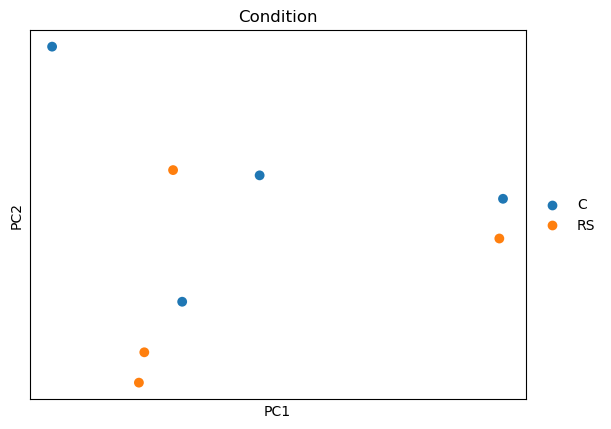

In [28]:
sc.pl.pca(dds, color = 'Condition', size = 200)

In [29]:
#GSEA https://gseapy.readthedocs.io/en/latest/introduction.html
# Gene set enrichment analysis
import gseapy as gp
from gseapy.plot import gseaplot

In [30]:
# differential expression result from Deseq2
res

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Symbol
Geneid,,,,,,,
ENSG00000160072,320.481168,-0.492175,0.147030,-3.347457,0.000816,0.013103,ATAD3B
ENSG00000041988,103.354977,-0.282138,0.130485,-2.162226,0.030601,0.173132,THAP3
ENSG00000198744,120.137318,0.569431,2.236123,0.254651,NaN,NaN,MTCO3P12
ENSG00000142611,23.766575,-1.889206,0.883023,-2.139474,0.032397,0.179729,PRDM16
ENSG00000225630,922.811465,0.732964,0.408622,1.793748,0.072853,0.292902,MTND2P28
...,...,...,...,...,...,...,...
ENSG00000198727,46929.471443,0.271032,0.268362,1.009949,0.312520,0.628155,MT-CYB
ENSG00000210196,77.259551,0.457372,0.223366,2.047635,0.040596,0.206184,MT-TP
ENSG00000276256,32.825088,-0.834185,0.632601,-1.318659,0.187283,0.487127,AC011043.1


In [31]:
# The "stat" column in the DESeq2 output represents the Wald test statistic for each gene.
# DESeq2 uses a model based on the negative binomial distribution to analyze count data from high-throughput sequencing assays.
# The Wald test is used to test the null hypothesis that a particular variable (in this case, the gene's expression level) has no effect.
# The Wald test statistic is calculated as (estimate / standard error). A positive Wald test statistic indicates that the gene is
#  more expressed in the condition of interest compared to the reference condition, while a negative Wald test statistic indicates that the gene is less expressed.
# The magnitude of the Wald test statistic gives you an idea of the strength of the evidence against the null hypothesis.
#  Larger absolute values indicate stronger evidence against the null hypothesis.
# In the context of DESeq2, genes with large absolute Wald test statistics are those with the most significant differential expression between the conditions being compared.
ranking = res[['Symbol', 'stat']].dropna().sort_values('stat', ascending = False)
ranking

,Symbol,stat
Geneid,,
ENSG00000040341,STAU2,10.143220
ENSG00000145390,USP53,8.254562
ENSG00000106366,SERPINE1,7.809237
ENSG00000261115,TMEM178B,7.735058
ENSG00000197746,PSAP,7.382811
...,...,...
ENSG00000164163,ABCE1,-9.725978
ENSG00000143549,TPM3,-9.793049
ENSG00000071626,DAZAP1,-9.828079


In [32]:
ranking = ranking.drop_duplicates('Symbol')

In [33]:
ranking

,Symbol,stat
Geneid,,
ENSG00000040341,STAU2,10.143220
ENSG00000145390,USP53,8.254562
ENSG00000106366,SERPINE1,7.809237
ENSG00000261115,TMEM178B,7.735058
ENSG00000197746,PSAP,7.382811
...,...,...
ENSG00000164163,ABCE1,-9.725978
ENSG00000143549,TPM3,-9.793049
ENSG00000071626,DAZAP1,-9.828079


In [34]:
# The the gene set with the highest wald test values
manual_set = {'things':['STAU2', 'USP53', 'SERPINE1', 'TMEM178B', 'PSAP']}

In [35]:
#to look at available libraries
tota_library = gp.get_library_name()

In [36]:
# check to see if there are interesting libraries
[ x for x in tota_library if 'GO' in x]

['GO_Biological_Process_2013',
 'GO_Biological_Process_2015',
 'GO_Biological_Process_2017',
 'GO_Biological_Process_2017b',
 'GO_Biological_Process_2018',
 'GO_Biological_Process_2021',
 'GO_Biological_Process_2023',
 'GO_Cellular_Component_2013',
 'GO_Cellular_Component_2015',
 'GO_Cellular_Component_2017',
 'GO_Cellular_Component_2017b',
 'GO_Cellular_Component_2018',
 'GO_Cellular_Component_2021',
 'GO_Cellular_Component_2023',
 'GO_Molecular_Function_2013',
 'GO_Molecular_Function_2015',
 'GO_Molecular_Function_2017',
 'GO_Molecular_Function_2017b',
 'GO_Molecular_Function_2018',
 'GO_Molecular_Function_2021',
 'GO_Molecular_Function_2023',
 'SynGO_2022']

In [37]:
# use GO_Biological_Process_2021 geneset from the library
pre_res = gp.prerank(rnk = ranking,
                     gene_sets = ['GO_Biological_Process_2021', manual_set],
                     seed = 6, permutation_num = 100)

2023-08-03 00:12:04,855 [WARNING] Duplicated values found in preranked stats: 0.01% of genes
The order of those genes will be arbitrary, which may produce unexpected results.


In [38]:
# df = pd.DataFrame(pre_res.results)
# df.T.sort_values('nes').head()

In [39]:
# FDR: p value corrected, es: enrichment score, nes: normalized enrichment score
out = []

for term in list(pre_res.results):
    out.append([term,
               pre_res.results[term]['fdr'],
               pre_res.results[term]['es'],
               pre_res.results[term]['nes']])

out_df = pd.DataFrame(out, columns = ['Term','fdr', 'es', 'nes']).sort_values('fdr').reset_index(drop = True)
out_df

,Term,fdr,es,nes
0,GO_Biological_Process_2021__chromatin remodeli...,0.0,-0.802744,-2.585715
1,GO_Biological_Process_2021__DNA metabolic proc...,0.0,-0.645870,-3.024102
2,GO_Biological_Process_2021__nucleotide-excisio...,0.0,-0.771413,-2.372693
3,GO_Biological_Process_2021__mitotic cell cycle...,0.0,-0.548122,-2.457569
4,GO_Biological_Process_2021__peptide biosynthet...,0.0,-0.582218,-2.408444
...,...,...,...,...
2240,GO_Biological_Process_2021__protein K48-linked...,1.0,0.211289,0.646423
2241,GO_Biological_Process_2021__ventricular septum...,1.0,0.159313,0.572565
2242,GO_Biological_Process_2021__regulation of card...,1.0,-0.277981,-0.733459
2243,GO_Biological_Process_2021__mitochondrial elec...,1.0,-0.221929,-0.656890


In [40]:
# find out most negatively enriched term
out_df.sort_values('nes').iloc[0].Term

'GO_Biological_Process_2021__RNA splicing, via transesterification reactions with bulged adenosine as nucleophile (GO:0000377)'

[<Axes: xlabel='Gene Rank', ylabel='Ranked metric'>,
 <Axes: >,
 <Axes: >,
 <Axes: ylabel='Enrichment Score'>]

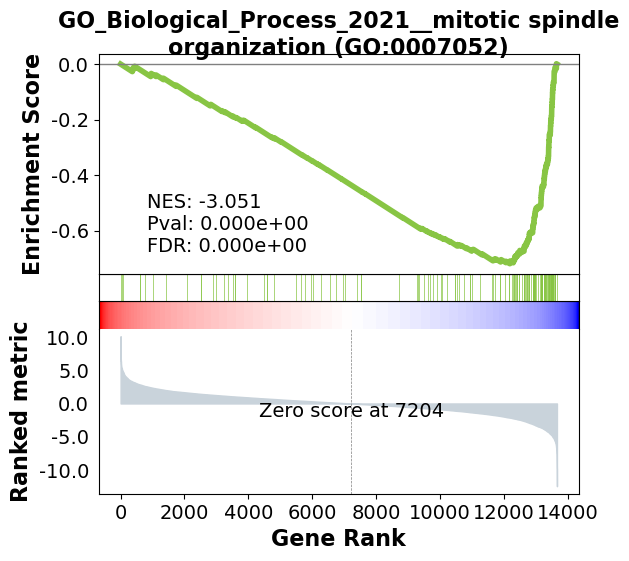

In [41]:
gseaplot(rank_metric=pre_res.ranking,
         term = 'GO_Biological_Process_2021__mitotic spindle organization (GO:0007052)',
         **pre_res.results['GO_Biological_Process_2021__mitotic spindle organization (GO:0007052)'])

In [42]:
import numpy as np
import seaborn as sns

In [43]:
dds.layers['normed_counts']

array([[  0.        ,   0.99504649, 359.21178396, ...,  19.90092986,
         55.72260361,   0.        ],
       [  0.        ,   0.        , 326.26705735, ...,   0.        ,
         42.02503081,   0.        ],
       [  0.86997733,   0.        , 361.91056914, ...,   0.        ,
         46.9787758 ,   0.86997733],
       ...,
       [  0.        ,   3.12841738, 272.17231221, ...,  18.77050429,
        104.80198229,   0.        ],
       [  0.        ,   2.08655037, 256.64569522, ...,   0.        ,
         51.12048401,   0.        ],
       [  3.53873778,   2.35915852, 238.27501079, ...,   0.        ,
         62.51770085,   0.        ]])

In [44]:
np.log1p([0,1,2,3])

array([0.        , 0.69314718, 1.09861229, 1.38629436])

In [45]:
# why log1p here?
dds.layers['log1p'] = np.log1p(dds.layers['normed_counts'])

In [46]:
dds.layers['log1p']

array([[0.        , 0.69066735, 5.88669215, ..., 3.03979365, 4.03817278,
        0.        ],
       [0.        , 0.        , 5.79077653, ..., 0.        , 3.76178206,
        0.        ],
       [0.62592631, 0.        , 5.89415644, ..., 0.        , 3.87075874,
        0.62592631],
       ...,
       [0.        , 1.41789413, 5.61010278, ..., 2.98419114, 4.66156926,
        0.        ],
       [0.        , 1.12705408, 5.55158537, ..., 0.        , 3.95355804,
        0.        ],
       [1.51264895, 1.2116905 , 5.47761356, ..., 0.        , 4.15131862,
        0.        ]])

In [47]:
sigs.head()

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Symbol
Geneid,,,,,,,
ENSG00000069424,231.438079,1.135128,0.276396,4.106888,4.010261e-05,1.342057e-03,KCNAB2
ENSG00000116254,16.685968,2.713808,0.659952,4.112128,3.920295e-05,1.322754e-03,CHD5
ENSG00000204138,315.739587,-0.543588,0.131546,-4.132290,3.591674e-05,1.239615e-03,PHACTR4
ENSG00000198830,1111.179223,-1.207821,0.352071,-3.430615,6.022151e-04,1.041796e-02,HMGN2
ENSG00000060688,363.794327,-0.623651,0.093196,-6.691831,2.203960e-11,1.138621e-08,SNRNP40


In [48]:
dds_sigs = dds[:, sigs.index]
dds_sigs

View of AnnData object with n_obs × n_vars = 8 × 1162
    obs: 'Condition'
    uns: 'trend_coeffs', '_squared_logres', 'prior_disp_var', 'pca', 'Condition_colors'
    obsm: 'design_matrix', 'size_factors', 'X_pca'
    varm: 'non_zero', '_rough_dispersions', 'genewise_dispersions', '_genewise_converged', '_normed_means', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced', 'PCs'
    layers: 'normed_counts', '_mu_hat', '_mu_LFC', '_hat_diagonals', 'cooks', 'log1p'

In [49]:
grapher = pd.DataFrame(dds_sigs.layers['log1p'].T,
                       index=dds_sigs.var_names, columns=dds_sigs.obs_names)

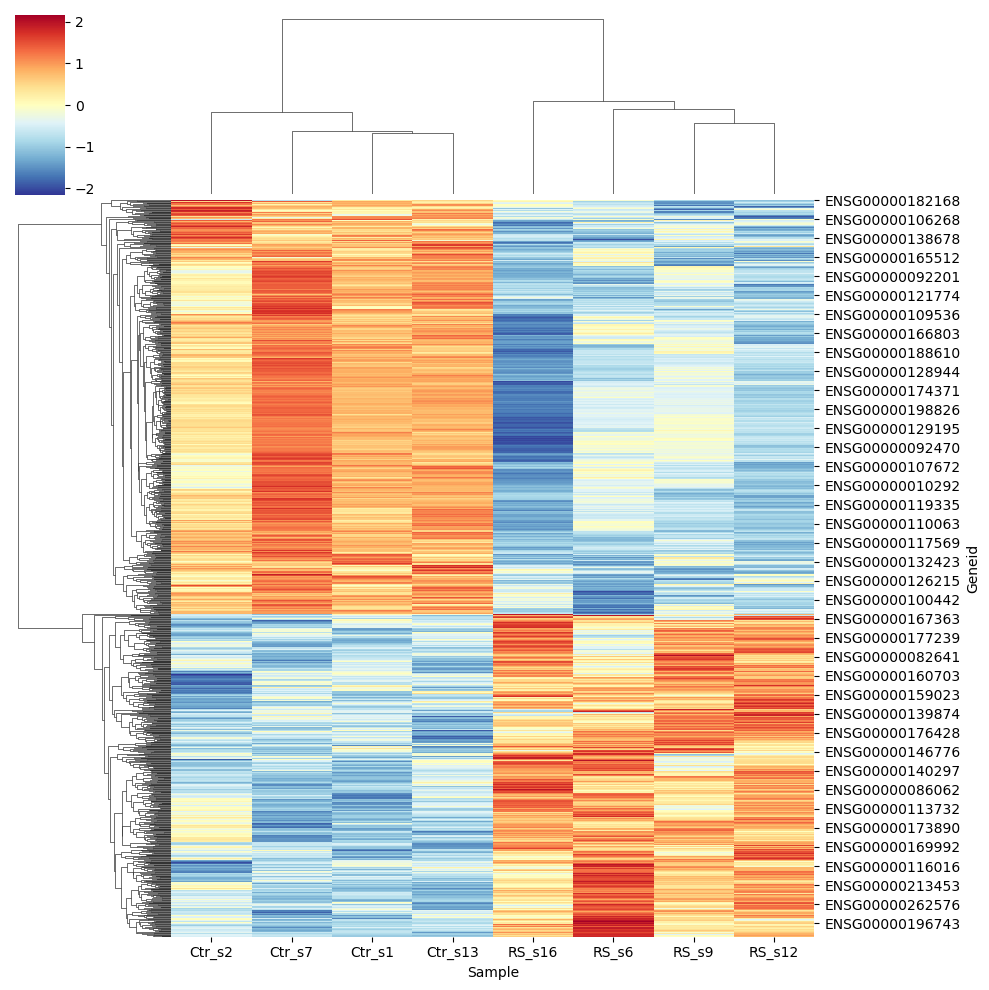

In [50]:
sns.clustermap(grapher, z_score=0, cmap = 'RdYlBu_r')

In [51]:
with open('senGPT.txt') as f:
    senGPT = [x.strip() for x in list(f)]

In [52]:
senGPT

['CDKN2A',
 'CDKN1A',
 'IL6',
 'IL8',
 'CXCL1',
 'CXCL2',
 'CXCL3',
 'MMP1',
 'MMP3',
 'MMP10',
 'SERPINE1',
 'IGFBP7',
 'IGFBP4',
 'IGFBP5',
 'IGFBP6',
 'GDF15',
 'EREG',
 'AREG',
 'HBEGF',
 'TGFA',
 'EDN1',
 'EDN2',
 'EDN3',
 'CCL2',
 'CCL20',
 'CXCL5',
 'CXCL6',
 'CXCL8',
 'CXCL11',
 'CXCL14']

In [53]:
sigs[sigs.Symbol.isin(senGPT)].index

Index(['ENSG00000145824', 'ENSG00000106366', 'ENSG00000147889',
       'ENSG00000130513'],
      dtype='object', name='Geneid')

In [54]:
dds_sub = dds[:, sigs[sigs.Symbol.isin(senGPT)].index]

In [55]:
dds_sub

View of AnnData object with n_obs × n_vars = 8 × 4
    obs: 'Condition'
    uns: 'trend_coeffs', '_squared_logres', 'prior_disp_var', 'pca', 'Condition_colors'
    obsm: 'design_matrix', 'size_factors', 'X_pca'
    varm: 'non_zero', '_rough_dispersions', 'genewise_dispersions', '_genewise_converged', '_normed_means', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced', 'PCs'
    layers: 'normed_counts', '_mu_hat', '_mu_LFC', '_hat_diagonals', 'cooks', 'log1p'

In [56]:
grapher = pd.DataFrame(dds_sub.layers['log1p'].T,
                       index=dds_sub.var_names, columns=dds_sub.obs_names)

In [57]:
grapher.index = grapher.index.map(mapper.mapper)

In [58]:
grapher

Sample,Ctr_s1,Ctr_s2,Ctr_s7,Ctr_s13,RS_s6,RS_s9,RS_s12,RS_s16
Geneid,,,,,,,,
CXCL14,1.095304,1.400287,2.759352,1.631832,4.708039,2.177140,3.678859,3.202404
SERPINE1,10.940599,11.100268,10.955758,11.153568,11.651848,12.029931,11.861163,11.947979
CDKN2A,5.551881,5.069954,5.113767,5.551664,5.702586,5.892561,6.610385,7.043327
GDF15,5.664932,4.638491,5.354388,5.475396,7.655135,6.890938,5.788436,5.806525


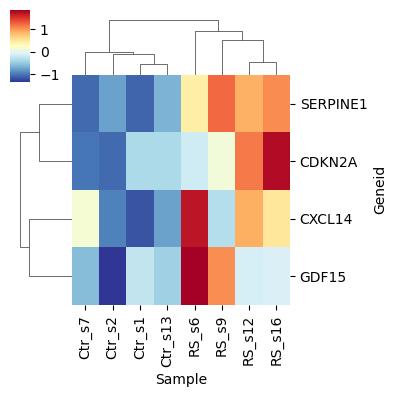

In [59]:
ax = sns.clustermap(grapher, z_score=0, cmap = 'RdYlBu_r', figsize=(4,4))

In [60]:
#volcano
from sanbomics.plots import volcano

In [61]:
res

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Symbol
Geneid,,,,,,,
ENSG00000160072,320.481168,-0.492175,0.147030,-3.347457,0.000816,0.013103,ATAD3B
ENSG00000041988,103.354977,-0.282138,0.130485,-2.162226,0.030601,0.173132,THAP3
ENSG00000198744,120.137318,0.569431,2.236123,0.254651,NaN,NaN,MTCO3P12
ENSG00000142611,23.766575,-1.889206,0.883023,-2.139474,0.032397,0.179729,PRDM16
ENSG00000225630,922.811465,0.732964,0.408622,1.793748,0.072853,0.292902,MTND2P28
...,...,...,...,...,...,...,...
ENSG00000198727,46929.471443,0.271032,0.268362,1.009949,0.312520,0.628155,MT-CYB
ENSG00000210196,77.259551,0.457372,0.223366,2.047635,0.040596,0.206184,MT-TP
ENSG00000276256,32.825088,-0.834185,0.632601,-1.318659,0.187283,0.487127,AC011043.1


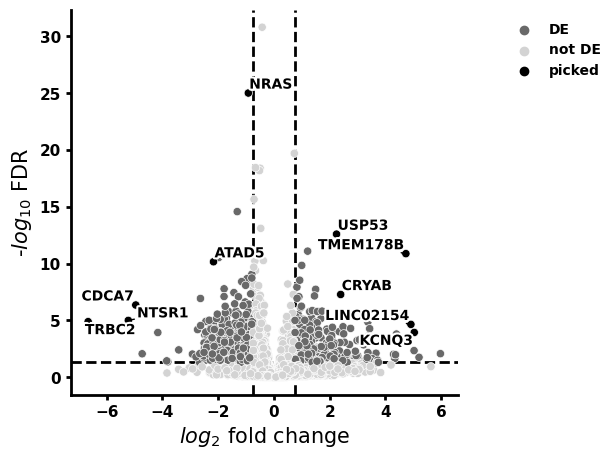

In [62]:
volcano(res, symbol='Symbol')

In [63]:
grapher.index

Index(['CXCL14', 'SERPINE1', 'CDKN2A', 'GDF15'], dtype='object', name='Geneid')

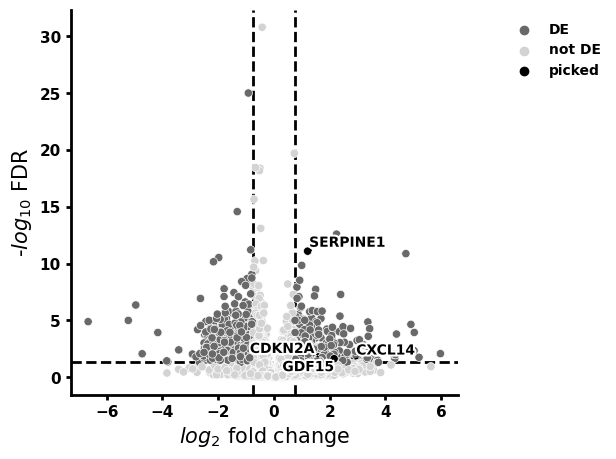

In [64]:
volcano(res, symbol='Symbol', to_label = grapher.index)